<a href="https://colab.research.google.com/github/varundubey2804/Customer_Churn_ANN/blob/main/Customer_chunk_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
data=pd.read_csv("Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.shape

(10000, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
data.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [10]:
data.duplicated().sum()

np.int64(0)

In [11]:
data['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [13]:
data['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [14]:
data['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [16]:
data.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [17]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [19]:
numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
print("Summary Statistics:\n")
print(data[numerical_cols].describe())

Summary Statistics:

        CreditScore           Age        Tenure        Balance  NumOfProducts  \
count  10000.000000  10000.000000  10000.000000   10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288       1.530200   
std       96.653299     10.487806      2.892174   62397.405202       0.581654   
min      350.000000     18.000000      0.000000       0.000000       1.000000   
25%      584.000000     32.000000      3.000000       0.000000       1.000000   
50%      652.000000     37.000000      5.000000   97198.540000       1.000000   
75%      718.000000     44.000000      7.000000  127644.240000       2.000000   
max      850.000000     92.000000     10.000000  250898.090000       4.000000   

       EstimatedSalary  
count     10000.000000  
mean     100090.239881  
std       57510.492818  
min          11.580000  
25%       51002.110000  
50%      100193.915000  
75%      149388.247500  
max      199992.480000  


In [22]:
import seaborn as sns

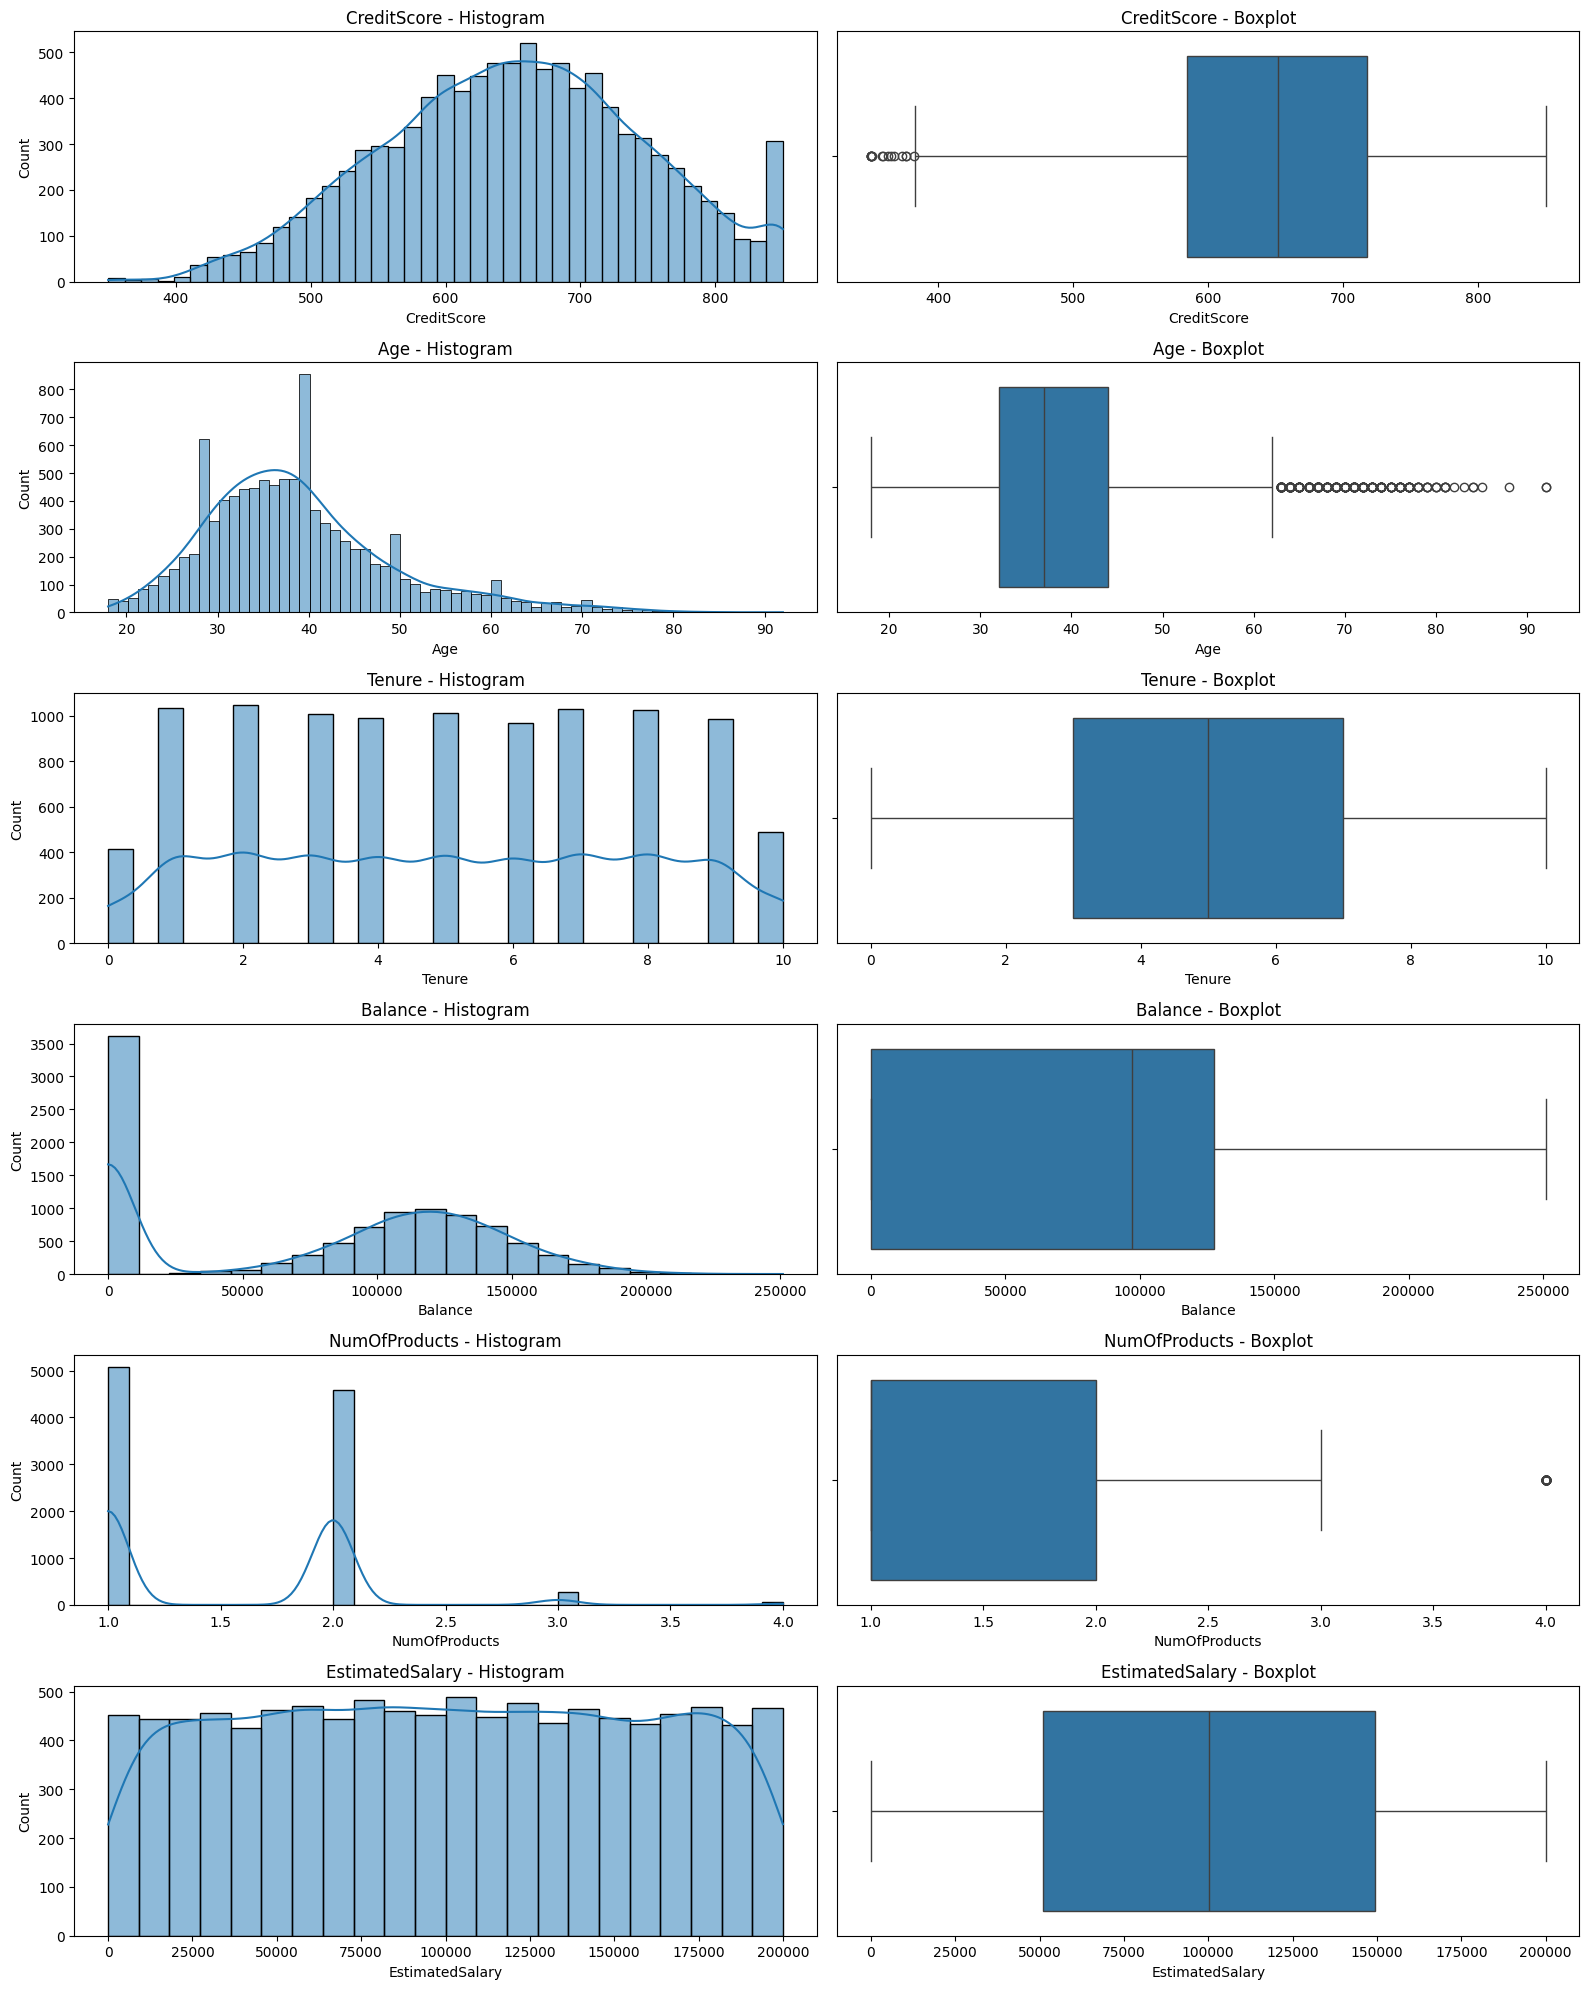

In [23]:
plt.figure(figsize=(16, 20))
for i, col in enumerate(numerical_cols):
    # Histogram
    plt.subplot(len(numerical_cols), 2, 2*i+1)
    sns.histplot(data[col], kde=True)
    plt.title(f'{col} - Histogram')

    # Boxplot
    plt.subplot(len(numerical_cols), 2, 2*i+2)
    sns.boxplot(x=data[col])
    plt.title(f'{col} - Boxplot')

plt.tight_layout()
plt.show()

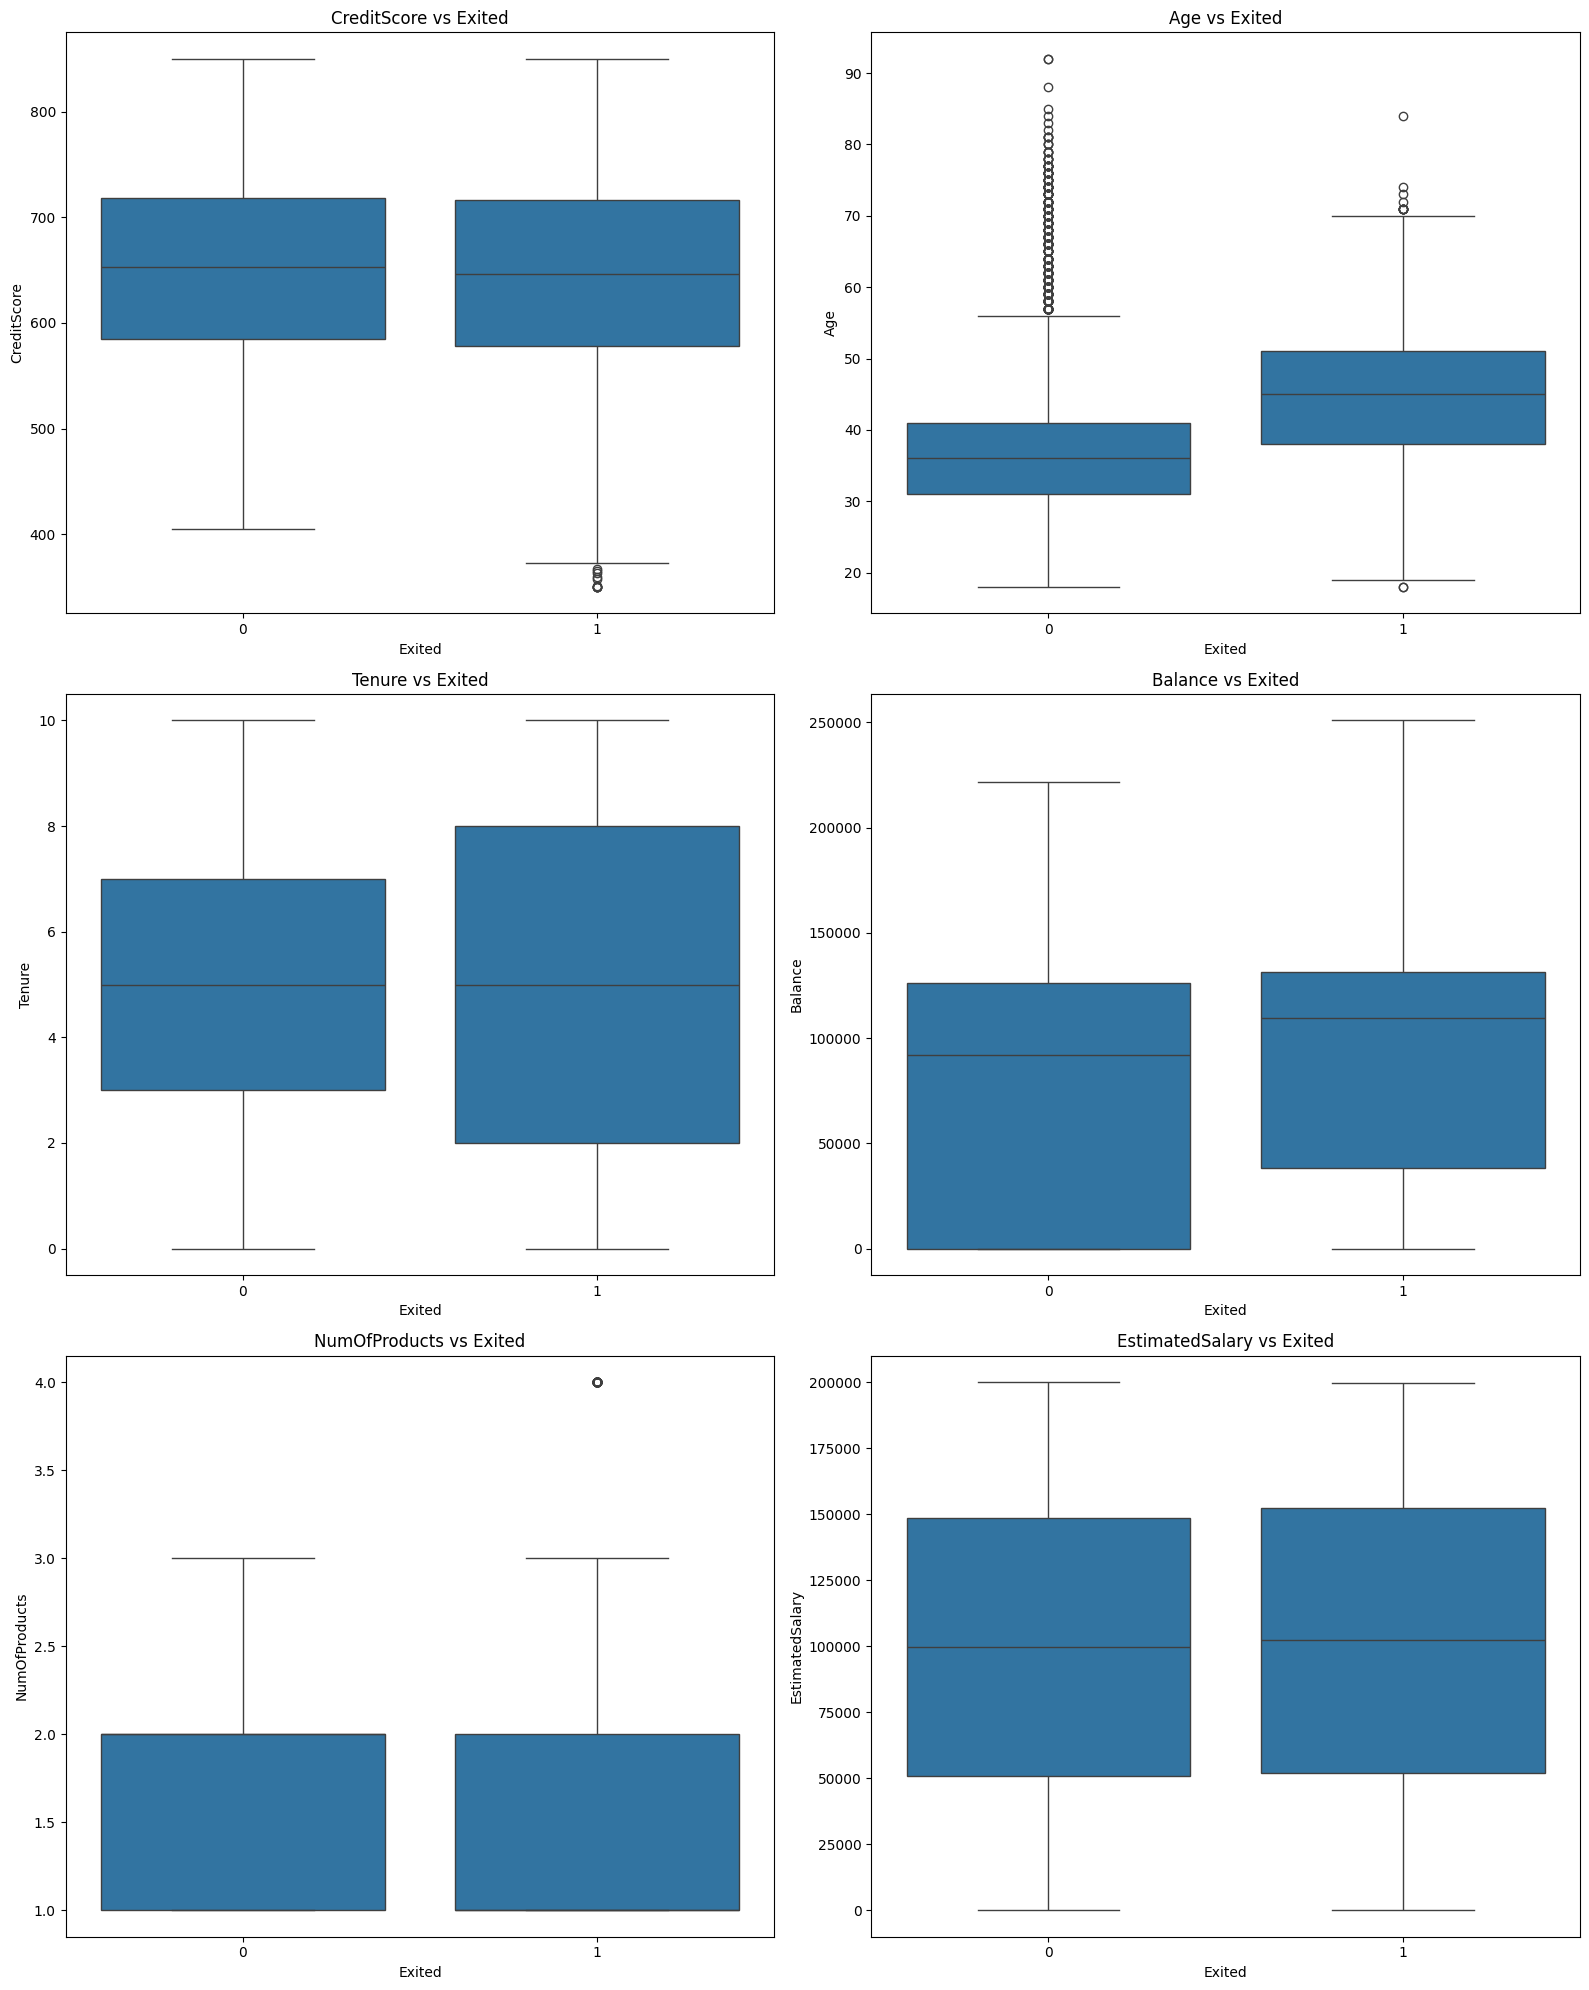

In [26]:
numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Plot boxplots
plt.figure(figsize=(16, 20))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x='Exited', y=col, data=data)
    plt.title(f'{col} vs Exited')

plt.tight_layout()
plt.show()


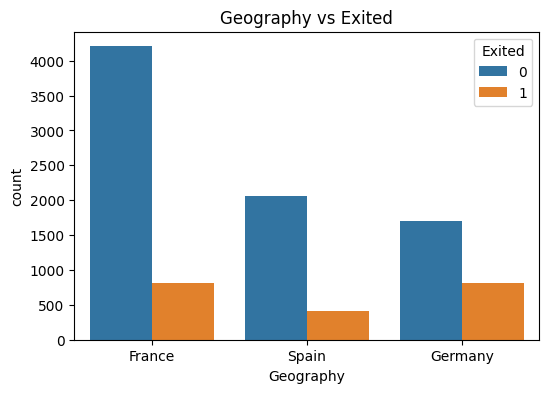

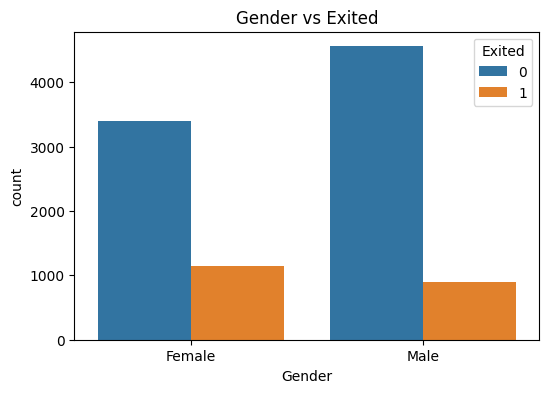

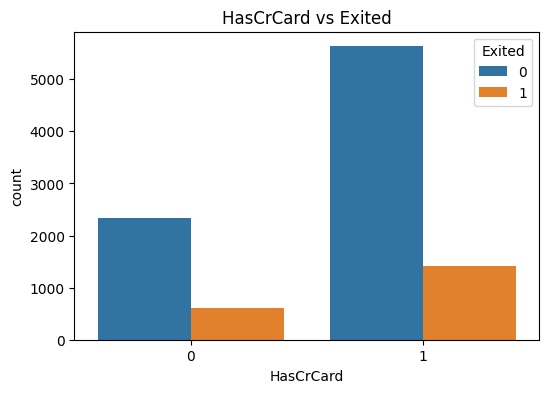

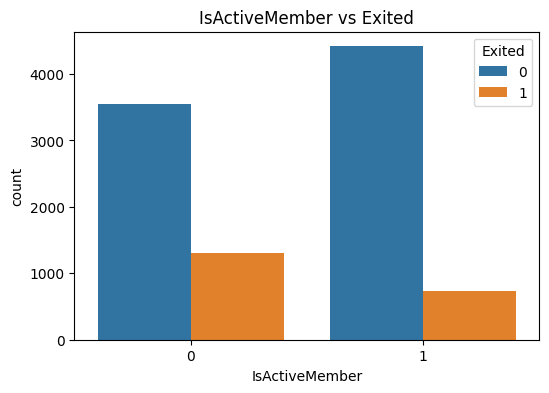

In [27]:
categorical_cols = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue='Exited', data=data)
    plt.title(f'{col} vs Exited')
    plt.show()

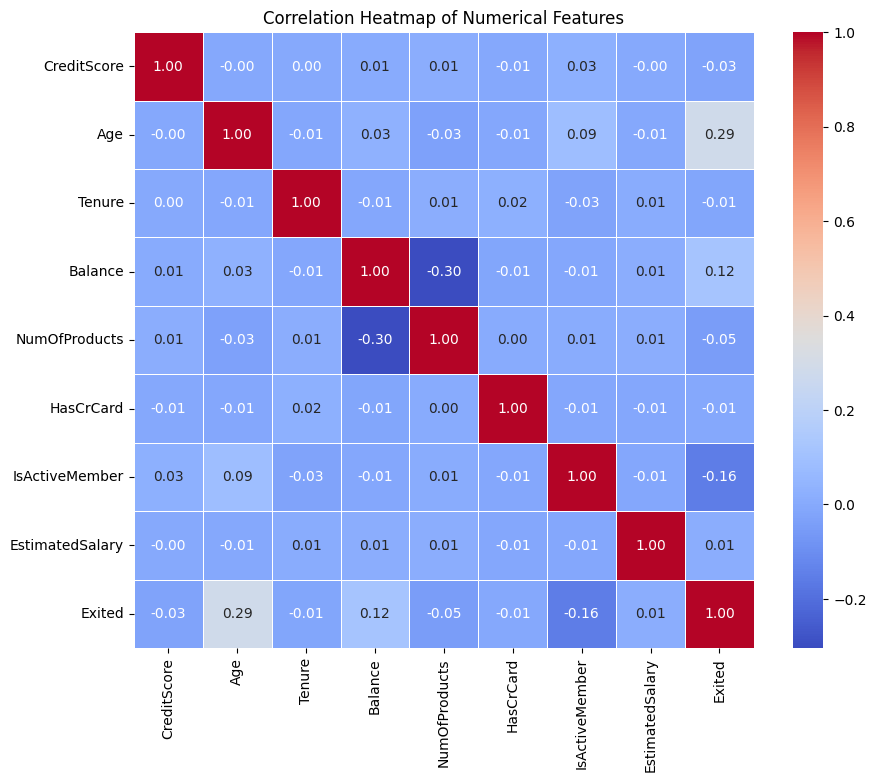

In [28]:
corr = data.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

Class Counts:
 Exited
0    7963
1    2037
Name: count, dtype: int64

Class Percentages:
 Exited
0    79.63
1    20.37
Name: proportion, dtype: float64


<ipython-input-29-7a94c0bdeb77>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Exited', data=data, palette='Set2')


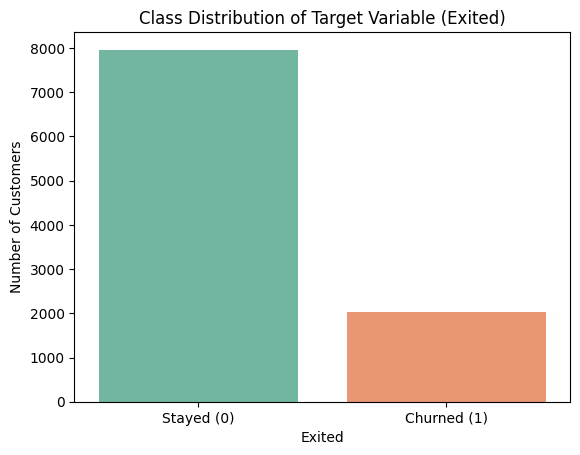


Feature Means Grouped by Exited:
               Age       Balance  EstimatedSalary  CreditScore
Exited                                                       
0       37.408389  72745.296779     99738.391772   651.853196
1       44.837997  91108.539337    101465.677531   645.351497


In [29]:
class_counts = data['Exited'].value_counts()
class_percent = data['Exited'].value_counts(normalize=True) * 100

print("Class Counts:\n", class_counts)
print("\nClass Percentages:\n", class_percent)
sns.countplot(x='Exited', data=data, palette='Set2')
plt.title("Class Distribution of Target Variable (Exited)")
plt.xticks([0, 1], ['Stayed (0)', 'Churned (1)'])
plt.ylabel("Number of Customers")
plt.xlabel("Exited")
plt.show()
group_means = data.groupby('Exited')[['Age', 'Balance', 'EstimatedSalary', 'CreditScore']].mean()
print("\nFeature Means Grouped by Exited:\n", group_means)

In [34]:
data = pd.get_dummies(data,columns=['Geography','Gender'],drop_first=True)

In [35]:
X = data.drop(columns=['Exited'])
y = data['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [38]:
data.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [39]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [40]:
model = Sequential()

model.add(Dense(11,activation='sigmoid',input_dim=11))
model.add(Dense(11,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [43]:
history = model.fit(X_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1996 - loss: 1.0758 - val_accuracy: 0.6831 - val_loss: 0.6792
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7416 - loss: 0.6239 - val_accuracy: 0.7969 - val_loss: 0.5251
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7966 - loss: 0.5189 - val_accuracy: 0.7969 - val_loss: 0.5037
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7943 - loss: 0.5080 - val_accuracy: 0.7969 - val_loss: 0.5008
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7953 - loss: 0.5059 - val_accuracy: 0.7969 - val_loss: 0.5004
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7973 - loss: 0.5023 - val_accuracy: 0.7969 - val_loss: 0.5002
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7938 - loss: 0.5063 - val_accuracy: 0.7969 - val_loss: 0.5001
Epoch 8/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7913 - loss: 0.5101 - val_accu

In [44]:
y_pred = model.predict(X_test)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [46]:
y_pred = y_pred.argmax(axis=-1)


In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


0.7975